In [330]:
using Images, Colors

In [362]:
imgSize = 2000

2000

In [363]:
r = imgSize/2

1000.0

In [364]:
runs = 75

75

In [365]:
function xtorgb(x)
    
    #Three color values are set to 0 by default
    red = 0
    blue = 0
    green = 0
    
    #Determines the green color
    if x <= -1
        green = 255
    elseif x > -1 && x < 0
        green = -x*255
    elseif x >= 0 && x <= 2
        green = 0
    elseif x > 2 && x <= 3
        green = (x-2)*255
    elseif x > 3
        green = 255
    end
               
    #Determines the red color
    if x <= -2
        red = 255
    elseif x > -2 && x < -1
        red = (2+x)*255
    elseif x >= -1 && x <= 1
        red = 255
    elseif x > 1 && x < 2
        red = (2-x)*255
    elseif x >= 2
        red = 0
    end
                                    
    #Determines the blue color
    if x <= -3
        blue = 255
    elseif x >=-3 && x <= -2
        blue = (-x-2)*255
    elseif x >= -2 && x <= 0
        blue = 0
    elseif x > 0 && x < 1
        blue = x*255
    elseif x >= 1
        blue = 255
    end
                                                    
    return [red; green; blue]
end

xtorgb (generic function with 1 method)

In [366]:
xtorgb(1.235)

3-element Array{Float64,1}:
 195.075
   0.0  
 255.0  

In [367]:
valArray = 6*rand(imgSize,imgSize).-3;

In [368]:
rgbArray = zeros(3,imgSize,imgSize);

In [369]:
for i = 1:imgSize
    for j = 1:imgSize
        rgbArray[:,i,j] = xtorgb(valArray[i,j])
    end
end

rgbArray;

In [370]:
colorview(RGB, rgbArray / 255);

In [371]:
function picture(plane)
    resolutioni = size(plane)[1]
    resolutionj = size(plane)[2]
    white = [255.0; 255.0; 255.0]
    p = zeros(3, resolutioni, resolutionj)
    
    for i1 = 1:resolutioni
        line = zeros(3, resolutioni)
        
        for j1 = 1:resolutionj
            i = real.(plane[i1,j1])
            j = imag.(plane[i1,j1])
            a = xtorgb(3*atan(i,j)/pi)
            d = sqrt(i^2 + j^2)
            
            if d < 1
                c = white*(1-d)+d*a
            else
                c = a/d
            end
                
            for l = 1:3
                if c[l] < 0.0
                    c[l] = 0.0
                elseif c[l] > 255.0
                    c[l] = 255.0
                end
            end
                    
            line[:,j1] = c
        end
        
        p[:,:,i1] = line
    end
            
    return p
end    

picture (generic function with 1 method)

In [372]:
p = picture(valArray);

In [373]:
colorview(RGB, p / 255);

In [374]:
function f(x)
    return x^5 - x + 1
end

f (generic function with 1 method)

In [375]:
function df(x)
    return 5x^4 - 1
end

df (generic function with 1 method)

In [376]:
function newton(x)
    return x - f(x)/df(x)
end

newton (generic function with 1 method)

In [377]:
function steffensen(x)
    z = f(x)
    t5 = x^2
    t6 = t5^2
    t33 = x*(1+x*(1+x*(1+x*(1+x*(4+x*(3+x*(2+x*(1+t5*(6+
         x*(3+x*(1+t5*x*(4+x*(t6+1)))))))))))))
    if t33 == 0
        #println("zero")
        return x
    end
    return x-z/t33
end

steffensen (generic function with 1 method)

In [378]:
function g(x)
    return (f(x+f(x))/f(x))-1
end

g (generic function with 1 method)

In [379]:
function steffensen1(x)
    return x - f(x)/g(x)
end

steffensen1 (generic function with 1 method)

In [380]:
tmpa = transpose(2*collect(-r:r-1)/r);

In [381]:
tmpb = ones(1,imgSize);

In [382]:
plane = (transpose(tmpa)*tmpb)*1im;

In [383]:
plane = plane + (transpose(tmpb)*tmpa);

In [384]:
pictureArray = zeros(imgSize, imgSize, runs)*0im;

In [385]:
newPlane = zeros(imgSize, imgSize)*0im;

In [386]:
for i = 1:runs
    resolutioni = size(plane)[1]
    resolutionj = size(plane)[2]
    
    for i1 = 1:resolutioni
        for j1 = 1:resolutionj
            newPlane[i1,j1] = steffensen(plane[i1,j1])
        end
    end
    
    plane = newPlane
    
    pictureArray[:,:,i] = newPlane
end

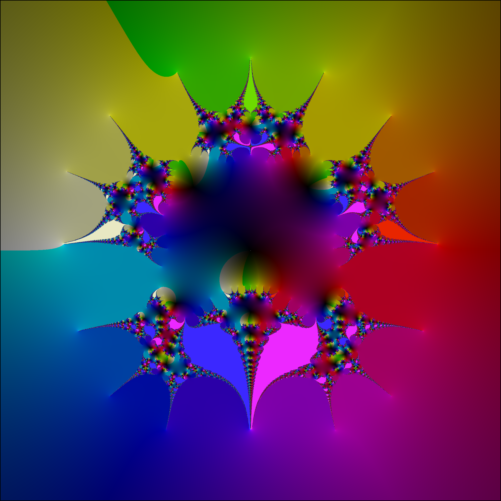

In [387]:
colorview(RGB, picture(pictureArray[:,:,runs]) / 255)